In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gaus(x,c0,center,sigma):
    return c0*np.exp(-(x-center)**2/(2*sigma**2))

+  A demo <sup>13</sup>C NMR spectrum span 0 ~ 200 ppm.
+  3 peaks located at 30 ppm, 100 ppm, and 175 ppm.
+  Assuming peaks are of 0.6ppm, 2.0ppm, and 1.0ppm linewidth in the above order.
+  Peak intensities are 1, 0.6, and 0.8 respectively

In [4]:
xx = np.linspace(0,200,1024)
yy = gaus(xx,1,30,0.6) + gaus(xx,0.6,100,1.5) + gaus(xx,0.8,175,1)

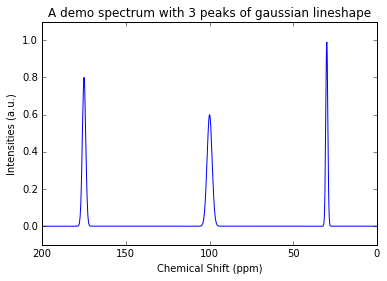

In [6]:
plt.plot(xx, yy)
plt.title("A demo spectrum with 3 peaks of gaussian lineshape")
plt.xlim(200,0)
plt.xlabel("Chemical Shift (ppm)")
plt.ylim(-0.1,1.1)
plt.ylabel("Intensities (a.u.)")
plt.show()

## Demo fitting and plotting T<sub>2</sub>

Each peak will decay exponentially through time, and we quantify the decay by T<sub>2</sub> using equation: 

Intensity = Initial_intensity * exp^(-t/ __T2__ )

In addition, the three peaks we just mentioned would most likely decay with different T<sub>2</sub>'s

In [7]:
# 80ms for the peak at 30ppm (aliphatic)
# 40ms for the peak at 100ppm (aromatic)
# 110ms for the peak at 175ppm (carbonyl)
np_t2s = np.array([80, 40, 110])
peaks = np.array([30,100,175])

### Generate a pseudo2D data

We can use a pseudo2D data to predict the T<sub>2</sub>'s experimentally. In the first dimension is our spectrum, and in the second demension we vary the delay time to observe decays of intensities.

In [8]:
lws = np.array([0.6,1.5,1.0]) # Linewidth

In [9]:
intensities = np.array([1, 0.6, 0.8])
time_seq = np.arange(0,300,5)
time_seq = time_seq[:,np.newaxis]

In [10]:
from fit_relaxations import t2_buildup #c0*(np.exp(-t/t2))

In [11]:
buildups = t2_buildup(time_seq,intensities,np_t2s)

In [12]:
yy = 0
for i in range(3):  # 3 peaks
    peak_buildup = buildups[:,i]
    peak_buildup = peak_buildup[:,np.newaxis]
    yy += gaus(xx,peak_buildup,peaks[i],lws[i])    

In [13]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [14]:
def plot_pseudo2D(spec, xticks=(0,100,10), yticks=(0,100,10), 
                  xticklabels=(0,100,10), yticklabels=(0,100,10),
                 xlabel="x axis", ylabel="y axis", figsize=(6,6)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax = sns.heatmap(spec)
    ax.yaxis.set_ticks(yticks)
    ax.yaxis.set_ticklabels(yticklabels)
    ax.xaxis.set_ticks(xticks)
    ax.xaxis.set_ticklabels(xticklabels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

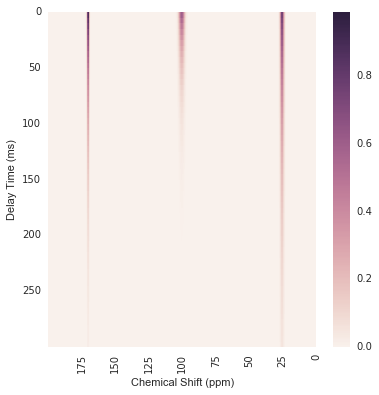

In [15]:
yticks = np.arange(60,0,-10)
yticklabels = np.arange(0,300,50)
xticks = np.arange(1024,0,-128)
xticklabels = np.arange(0,200,25)
plot_pseudo2D(yy,xticks=xticks,yticks=yticks,
              xticklabels=xticklabels,yticklabels=yticklabels,xlabel="Chemical Shift (ppm)",
              ylabel="Delay Time (ms)")

+  In reality, data always have noise.

In [16]:
noise = np.random.rand(yy.size)
noise = noise.reshape(yy.shape) * yy.max() * 0.05 # 5% noise level

In [17]:
yy_exp = yy + noise

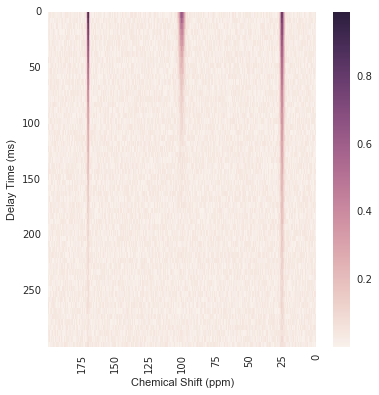

In [18]:
plot_pseudo2D(yy_exp,xticks=xticks,yticks=yticks,
              xticklabels=xticklabels,yticklabels=yticklabels,xlabel="Chemical Shift (ppm)",
              ylabel="Delay Time (ms)")

We can save this data to demo usage of fitting functions in module 'fit_relaxations.py'

In [21]:
np.savetxt("demo2D.txt",yy_exp)